# Punto2
## Algoritmo hill climbing
### Nicolás Patalagua

Importamos librerias que se van a usar:

In [0]:
import random
from copy import deepcopy
import matplotlib.pyplot as plt

Creamos la función de creación de individuos:

In [0]:
def create_individual(data):
    numerofinal = pow((len(data)), 2)
    numerosd = [i for i in range(1, numerofinal + 1)]
    for fila in data:
        for indice in range(len(fila)):
            numero = random.choice(numerosd)
            numerosd.pop(numerosd.index(numero))
            fila[indice] = numero
    return data

Creamos la función de mutación:

In [0]:
def mutate(individual):
    if1 = random.randrange(len(individual))
    if2 = random.randrange(len(individual))
    ic1 = random.randrange(len(individual[if1]))
    ic2 = random.randrange(len(individual[if1]))
    individual[if1][ic1], individual[if2][ic2] = individual[if2][ic2], individual[if1][ic1]
    return individual

Creamos la función Fitness:

In [0]:
def fitness(individual):
    puntaje = 0
    sumatoriai = (len(individual) * (pow((len(individual)), 2) + 1)) / 2
    for fila in individual:
        sumatoria = 0
        for indice in fila:
            sumatoria += indice
        if sumatoria == sumatoriai:
            puntaje += 1
    for columna in range(len(individual)):
        sumatoria = 0
        for fila in range(len(individual[columna])):
            sumatoria += individual[fila][columna]
        if sumatoria == sumatoriai:
            puntaje += 1
    sumatoria = 0
    for diagonal in range(len(individual)):
        sumatoria += individual[diagonal][diagonal]
    if sumatoria == sumatoriai:
        puntaje += 1
    for diagonal in reversed(range(len(individual))):
        sumatoria += individual[diagonal][diagonal]
    if sumatoria == sumatoriai:
        puntaje += 1
    return puntaje

Definimos la función para imprimir el tablero:

In [0]:
def imprimirtablero(tablero):
    for fila in tablero:
        for numero in fila:
            if numero < 10:
                print("0" + str(numero), end=" ")
            else:
                print(str(numero), end=" ")
        print("")

Definimos el ingreso de la dimensión de la grilla:

In [11]:
n = int(input("Digite el la dimensión de la grilla: "))

Digite el la dimensión de la grilla: 3


Representación de un individuo:

In [0]:
Tablero = []
for i in range(n):
    Tablero.append([0 for i in range(n)])

Creamos un tablero inicial:

In [0]:
Tablero = create_individual(Tablero)

Definimos las caracteristicas de la gráfica:

In [0]:
ejey = []
ejex = []

for i in range(1000):
    Tableroi = deepcopy(Tablero)
    Tableroa = mutate(Tablero)
    if fitness(Tableroa) >= fitness(Tableroi):
        Tablero = deepcopy(Tableroa)
    elif fitness(Tableroa) < fitness(Tableroi):
        Tablero = deepcopy(Tableroi)
    ejey.append(float(fitness(Tablero)))
    ejex.append(float(format(i)))

Calculos a realizarse:

In [0]:
mejorposible = int(n + n + 2)
mejorobtenido = int(fitness(Tablero))
prcentaje = float((100 * mejorobtenido) / mejorposible)

Imprimir datos obtenidos:

In [22]:
print("Porcentaje de acierto obtenido: " + str(prcentaje) + "%")
print("Fitness de la mejor solución: " + str(mejorobtenido))
print("Mejor fitness posible: " + str(mejorposible))
print("Sumatoria objetivo: " + str(int(n * (pow(n, 2) + 1) / 2)))

Porcentaje de acierto obtenido: 62.5%
Fitness de la mejor solución: 5
Mejor fitness posible: 8
Sumatoria objetivo: 15


Imprimimos el tablero:

In [23]:
imprimirtablero(Tablero)

04 02 09 
05 03 07 
06 01 08 


Gráfica:

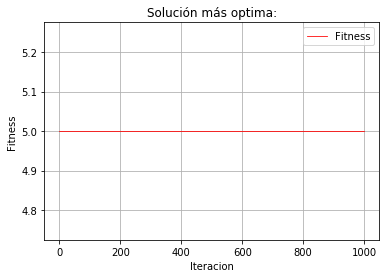

In [24]:
plt.plot(ejex, ejey, '-', linewidth=0.8, color='r', label='Fitness')
plt.xlabel('Iteracion')
plt.ylabel('Fitness')
plt.title('Solución más optima:')
plt.legend()
plt.grid()
plt.show()